In [ ]:
#### Ecommerce business Customer Segmentation

Problem statement

calculate the customer Value

1: Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary)

Recency, frequency, monetary value (RFM) is a model used in marketing analysis that 
segments a company’s consumer base by their purchasing patterns or habits. In particular, 
it evaluates customers’ recency (how long ago they made a purchase), 
frequency (how often they make purchases), and monetary value (how much money they spend).

2:Segment (Group/Cluster) Identify trends for Day, Month, Season, Time by Invoice count

3.Recommendation  engine - selection of  product for customer.


In [ ]:
# Recommendation  engine - selection of  product for customer.
### Assignment can work on similar dataset
(1)Find the CLTV -- customer life time valuation
(2)Top 10 selling products.
(3)Top selling products country wise.
(4)Association Rule mining- Market basket analysis  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
original_data=pd.read_excel("Ecommerce_business.xlsx")

In [4]:
df=original_data.copy()
df.head()

,Invoice_No,Item_Code,lower_floor,Item_Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice_No        541909 non-null  object        
 1   Item_Code         541909 non-null  object        
 2   lower_floor       1816 non-null    object        
 3   Item_Description  540455 non-null  object        
 4   Quantity          541909 non-null  int64         
 5   InvoiceDate       541909 non-null  datetime64[ns]
 6   UnitPrice         541909 non-null  float64       
 7   CustomerID        406829 non-null  float64       
 8   Country           541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [6]:
df.isnull().sum()

Invoice_No               0
Item_Code                0
lower_floor         540093
Item_Description      1454
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          135080
Country                  0
dtype: int64

In [7]:
#fIRST PROBLEM STATEMENT:- CUSTOMER SEGREGATION ON BASIS OF BUYING PATTERN( RFM- Recency, Frequency,Monetary)

In [8]:
df1=df.drop(["Item_Code","lower_floor","Item_Description","Country"],axis=1)

In [9]:
df1.head(100)

,Invoice_No,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...
95,536378,6,2010-12-01 09:37:00,2.55,14688.0
96,536378,120,2010-12-01 09:37:00,0.42,14688.0
97,536378,24,2010-12-01 09:37:00,0.55,14688.0
98,536378,24,2010-12-01 09:37:00,0.55,14688.0


In [10]:
df1.isnull().sum()

Invoice_No          0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [11]:
df1.dropna(inplace=True)

In [12]:
df1.shape

(406829, 5)

In [13]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [16]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [17]:
df1[df1["UnitPrice"]==0].head(50)

,Invoice_No,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


In [18]:
df1[df1["UnitPrice"]==0]["UnitPrice"]

9302      0.0
33576     0.0
40089     0.0
47068     0.0
47070     0.0
56674     0.0
86789     0.0
130188    0.0
139453    0.0
145208    0.0
157042    0.0
187613    0.0
198383    0.0
279324    0.0
282912    0.0
285657    0.0
298054    0.0
314745    0.0
314746    0.0
314747    0.0
314748    0.0
358655    0.0
361825    0.0
379913    0.0
395529    0.0
420404    0.0
436428    0.0
436597    0.0
436961    0.0
439361    0.0
446125    0.0
446793    0.0
446794    0.0
454463    0.0
454464    0.0
479079    0.0
479546    0.0
480649    0.0
485985    0.0
502122    0.0
Name: UnitPrice, dtype: float64

In [19]:
#just discarding the return items only 
df1=df1[df1["Quantity"]>0]

In [20]:
df1.shape

(397924, 5)

In [21]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [22]:
df1.head(2)

,Invoice_No,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [23]:
# create a total amount column (unit price*qty)

In [24]:
df[df['UnitPrice'] == 0]['Item_Description'].value_counts()


check                                  159
?                                       47
damages                                 45
damaged                                 43
found                                   25
                                      ... 
HEART GARLAND RUSTIC PADDED              1
CHICK GREY HOT WATER BOTTLE              1
mystery! Only ever imported 1800         1
MERCHANT CHANDLER CREDIT ERROR, STO      1
lost                                     1
Name: Item_Description, Length: 376, dtype: int64

In [25]:
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]

In [26]:
df1.head(2)

,Invoice_No,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [27]:
df2=df1.drop(["Quantity","UnitPrice"],axis=1)

In [28]:
df2.head(10)

,Invoice_No,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34
5,536365,2010-12-01 08:26:00,17850.0,15.30
6,536365,2010-12-01 08:26:00,17850.0,25.50
7,536366,2010-12-01 08:28:00,17850.0,11.10
8,536366,2010-12-01 08:28:00,17850.0,11.10
9,536367,2010-12-01 08:34:00,13047.0,54.08


In [29]:
# we require to add all the total with respect to the common invoice no.

In [30]:
df_final=df2.groupby(["Invoice_No","InvoiceDate","CustomerID"]).agg({"Total":"sum"}).reset_index()

In [31]:
df_final.head()

,Invoice_No,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [32]:
df_final.shape

(18566, 4)

In [33]:
# Recency ,Frequency ,Monetary

In [34]:
#Recency=last business date- last purchase date (by a respective client)

In [35]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18566 entries, 0 to 18565
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice_No   18566 non-null  int64         
 1   InvoiceDate  18566 non-null  datetime64[ns]
 2   CustomerID   18566 non-null  float64       
 3   Total        18566 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 580.3 KB


In [36]:
max(df_final["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [37]:
min(df_final["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

In [38]:
# we have one year dataset

In [39]:
# we have to create a variable last_business_date
#we will add 1 day extra in the max invoice date-- that will be our last business date

In [40]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [41]:
#Recency-->latest_business date-last transaction(particular customer)
#Frequency---> count the Cutomer ID (REPETATION OF THE cid)
#Monetary--> summation of total w.r.to Customer ID

In [42]:
RFM_score=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                             "Invoice_No":lambda x:x.count(),
                                             "Total":lambda x:x.sum()}).reset_index()

In [43]:
RFM_score

,CustomerID,InvoiceDate,Invoice_No,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4334,18280.0,277,1,180.60
4335,18281.0,180,1,80.82
4336,18282.0,7,2,178.05
4337,18283.0,3,16,2094.88


In [44]:
# lets rename the columns as Recency, Frequency and monetary

In [45]:
#Rename the columns
RFM_score.rename(columns={"InvoiceDate":"Recency","Invoice_No":"Frequency","Total":"Monetary"},inplace=True)
RFM_score.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [46]:
# we will create a column (R_marks--> recency marks) to give the effective marks , 
#as high recency -- low marks, low recency high marks

In [47]:
RFM_score["R_Marks"]=RFM_score["Recency"].rank(ascending=False)

In [48]:
RFM_score.head(10)

,CustomerID,Recency,Frequency,Monetary,R_Marks
0,12346.0,325,1,77183.60,162.5
1,12347.0,2,7,4310.00,4156.5
2,12348.0,75,4,1797.24,1646.0
3,12349.0,18,1,1757.55,3209.5
4,12350.0,310,1,334.40,227.5
5,12352.0,36,8,2506.04,2502.5
6,12353.0,204,1,89.00,725.5
7,12354.0,232,1,1079.40,602.5
8,12355.0,214,1,459.40,672.5
9,12356.0,22,3,2811.43,3037.5


In [49]:
RFM_score["F_Marks"]=RFM_score["Frequency"].rank(ascending=True)
RFM_score["M_Marks"]=RFM_score["Monetary"].rank(ascending=True)

In [50]:
RFM_score.head(10)

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0
5,12352.0,36,8,2506.04,2502.5,3828.0,3638.0
6,12353.0,204,1,89.00,725.5,746.5,117.0
7,12354.0,232,1,1079.40,602.5,746.5,2780.0
8,12355.0,214,1,459.40,672.5,746.5,1660.0
9,12356.0,22,3,2811.43,3037.5,2581.5,3739.0


In [51]:
# we want to find the percentile in the class/column

In [52]:
RFM_score["R_Rank"]=(RFM_score["R_Marks"]/RFM_score["R_Marks"].max())*100

In [53]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,R_Rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767


In [54]:
RFM_score["F_Rank"]=(RFM_score["F_Marks"]/RFM_score["F_Marks"].max())*100
RFM_score["M_Rank"]=(RFM_score["M_Marks"]/RFM_score["M_Marks"].max())*100

In [55]:
RFM_score.head(10)

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,R_Rank,F_Rank,M_Rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767,17.204425,28.347546
5,12352.0,36,8,2506.04,2502.5,3828.0,3638.0,57.901435,88.223093,83.844204
6,12353.0,204,1,89.00,725.5,746.5,117.0,16.786210,17.204425,2.696474
7,12354.0,232,1,1079.40,602.5,746.5,2780.0,13.940305,17.204425,64.070062
8,12355.0,214,1,459.40,672.5,746.5,1660.0,15.559926,17.204425,38.257663
9,12356.0,22,3,2811.43,3037.5,2581.5,3739.0,70.279963,59.495275,86.171929


In [56]:
# WE ARE UNDERSTANDING THE GENERIC CONCEPT - WHICH CAN BE APPLY ON FIFFERENT INDUSTRIES.

In [57]:
RFM=RFM_score.copy()

In [58]:
RFM["RFM_final"]=0.20*RFM["R_Rank"]+0.30*RFM["F_Rank"]+0.50*RFM["M_Rank"]

In [59]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,R_Rank,F_Rank,M_Rank,RFM_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833,17.204425,99.792579,55.809584
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327,91.021429
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220,69.785665,76.837981,66.971534
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602,17.204425,76.192671,58.109583
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767,17.204425,28.347546,20.387854


In [60]:
RFM=RFM.round(2)
RFM

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,R_Rank,F_Rank,M_Rank,RFM_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,55.81
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.02
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,66.97
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,58.11
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.39
...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,355.0,746.5,564.0,8.21,17.20,13.00,13.30
4335,18281.0,180,1,80.82,860.0,746.5,105.0,19.90,17.20,2.42,10.35
4336,18282.0,7,2,178.05,3839.5,1910.5,547.0,88.84,44.03,12.61,37.28
4337,18283.0,3,16,2094.88,4064.5,4182.5,3489.0,94.04,96.39,80.41,87.93


In [61]:
# LETS CREATE 4 GROUPS-- 4 NO. OF CLUSTERS

In [62]:
# quantile approach 

In [63]:
quant=RFM["RFM_final"].quantile(q=[0.25,0.50,0.75])

In [64]:
quant

0.25    27.725
0.50    48.780
0.75    71.490
Name: RFM_final, dtype: float64

In [65]:
# we can create 5 groups also
quant10=RFM["RFM_final"].quantile(q=[0.10,0.30,0.45,0.70])
quant10

0.10    16.454
0.30    31.732
0.45    44.612
0.70    66.680
Name: RFM_final, dtype: float64

In [66]:
# visualization approach 

In [67]:
# step function --- ECDF --emperical cummulative distributionfunction- it add on the values

<Axes: xlabel='RFM_final', ylabel='Proportion'>

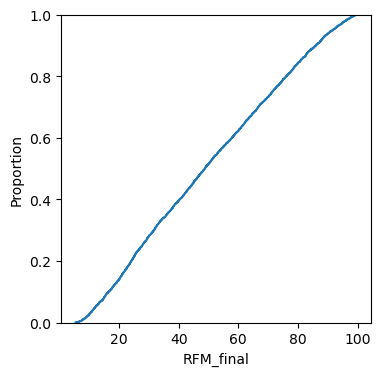

In [68]:
plt.figure(figsize=(4,4))
sns.ecdfplot(data=RFM["RFM_final"])

In [69]:
# silver,Gold,Diamond,Platinum

In [94]:
def cust_category(x):
    if x<=27.72:
        return "Silver"
    if x<=48.78:
        return "Gold"
    if x<=71.49:
        return "Diamond"
    else:
        return "Platinum"

In [95]:
RFM["Group"]=RFM["RFM_final"].apply(cust_category)
RFM.head(10)

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,R_Rank,F_Rank,M_Rank,RFM_final,Group,Cluster
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,55.81,Diamond,3
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.02,Platinum,1
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,66.97,Diamond,3
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,58.11,Diamond,3
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.39,Silver,2
5,12352.0,36,8,2506.04,2502.5,3828.0,3638.0,57.90,88.22,83.84,79.97,Platinum,1
6,12353.0,204,1,89.00,725.5,746.5,117.0,16.79,17.20,2.70,9.87,Silver,2
7,12354.0,232,1,1079.40,602.5,746.5,2780.0,13.94,17.20,64.07,39.98,Gold,0
8,12355.0,214,1,459.40,672.5,746.5,1660.0,15.56,17.20,38.26,27.40,Silver,2
9,12356.0,22,3,2811.43,3037.5,2581.5,3739.0,70.28,59.50,86.17,74.99,Platinum,1


In [96]:
RFM["Group"].value_counts()

Platinum    1085
Silver      1085
Gold        1085
Diamond     1084
Name: Group, dtype: int64

In [97]:
# kmeans clustering 

In [98]:
final_data=pd.DataFrame(RFM["RFM_final"])
final_data

,RFM_final
0,55.81
1,91.02
2,66.97
3,58.11
4,20.39
...,...
4334,13.30
4335,10.35
4336,37.28
4337,87.93


##### kmeans is widely used clustering approach . It minimize the variance within the cluster.
#centroid based algorithm.
different between kmeans & kmenas++(defaut init parameter)
kmenas++ initialize the centroid position intelligently .

In [99]:
# lets scale the values
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

In [100]:
scale=MinMaxScaler()
final_data_scaled=scale.fit_transform(final_data)
final_data_scaled
final_data_scaled=pd.DataFrame(final_data_scaled,columns=final_data.columns)
final_data_scaled

,RFM_final
0,0.533425
1,0.905860
2,0.651470
3,0.557753
4,0.158769
...,...
4334,0.083774
4335,0.052570
4336,0.337423
4337,0.873175


In [101]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'Sum of square error')

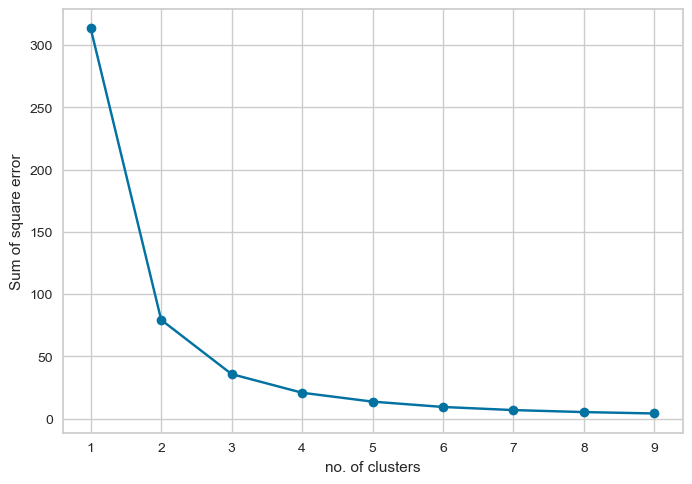

In [102]:
SSE=[]
for i in range(1,10):
    kmeans1=KMeans(max_iter=100,random_state=100,n_clusters=i)
    kmeans1.fit_predict(final_data_scaled)
    SSE.append(kmeans1.inertia_)
    
plt.plot(range(1,10),SSE,marker="o")
plt.xlabel("no. of clusters")
plt.ylabel("Sum of square error")


In [80]:
# calculate the silhouette score w..r.to clusters

In [103]:
for i in range(2,9):
    kmeans2=KMeans(max_iter=100,random_state=100,n_clusters=i)
    kmeans2.fit(final_data_scaled)
    silhoutte=silhouette_score(final_data_scaled,kmeans2.labels_)
    print("for {} score {}".format(i,silhoutte))
    

for 2 score 0.6256262261585409
for 3 score 0.5884544423323724
for 4 score 0.5633324533135928
for 5 score 0.5452239191592716
for 6 score 0.5450751496194505
for 7 score 0.5428077260671375
for 8 score 0.5393158399413998


In [ ]:
# assignment :-do the clustering keep no. of clusters =4

In [83]:
#!pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


In [104]:
from yellowbrick.cluster import KElbowVisualizer

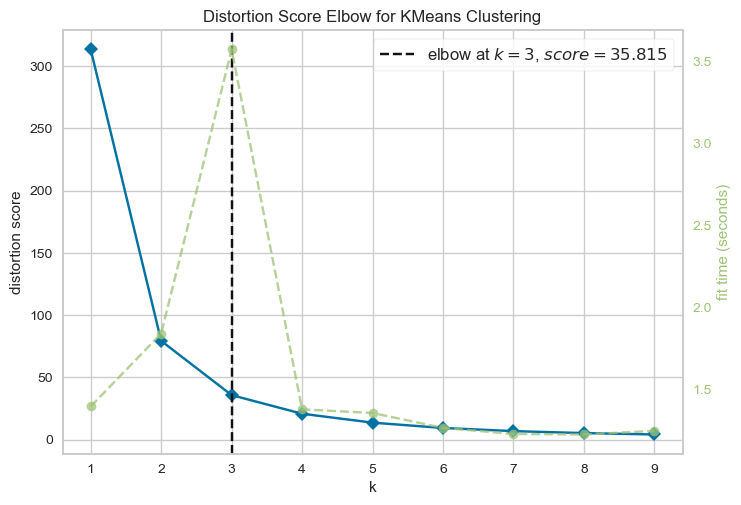

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,10)).fit(final_data_scaled)
visualizer.show()

In [106]:
kmeans=KMeans(n_clusters=4,random_state=101)
y_kmeans=kmeans.fit_predict(final_data_scaled)
y_kmeans

array([3, 1, 3, ..., 0, 1, 3])

In [107]:
RFM["Cluster"]=y_kmeans

In [108]:
RFM.head(20)

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,R_Rank,F_Rank,M_Rank,RFM_final,Group,Cluster
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,55.81,Diamond,3
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.02,Platinum,1
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,66.97,Diamond,3
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,58.11,Diamond,3
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.39,Silver,2
5,12352.0,36,8,2506.04,2502.5,3828.0,3638.0,57.90,88.22,83.84,79.97,Platinum,1
6,12353.0,204,1,89.00,725.5,746.5,117.0,16.79,17.20,2.70,9.87,Silver,2
7,12354.0,232,1,1079.40,602.5,746.5,2780.0,13.94,17.20,64.07,39.98,Gold,0
8,12355.0,214,1,459.40,672.5,746.5,1660.0,15.56,17.20,38.26,27.40,Silver,2
9,12356.0,22,3,2811.43,3037.5,2581.5,3739.0,70.28,59.50,86.17,74.99,Platinum,1


In [109]:
RFM["Cluster"].value_counts()

2    1235
0    1119
3    1030
1     955
Name: Cluster, dtype: int64

In [110]:
RFM["Group"].value_counts()

Platinum    1085
Silver      1085
Gold        1085
Diamond     1084
Name: Group, dtype: int64

In [ ]:
# assignemnt please try another agglomerative


In [ ]:
GOAL NO. 2:- Analysing the business sales trend-
    (1)When is the highest sales(Month/season/day/timing )
    # (2)when is the rush hour- month /season day/ morning afternoon/evening /weekdays/weekends

In [111]:
df_final.head()

,Invoice_No,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [ ]:
# from month - we can create seasons
# from day we can create week day/ weekends
#from hour we can create morning afternoon evening , night

In [112]:
import datetime as dt

In [113]:
# extraction of Day from datetime (invoicedate)
df_final["Day"]=df_final["InvoiceDate"].dt.day_name()
df_final.head()

,Invoice_No,InvoiceDate,CustomerID,Total,Day
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday


In [114]:
df_final["Day"].value_counts()

Thursday     4038
Wednesday    3462
Tuesday      3189
Monday       2865
Friday       2835
Sunday       2177
Name: Day, dtype: int64

In [115]:
# extraction of Month,Hour from datetime (invoicedate)
df_final["Month"]=df_final["InvoiceDate"].dt.month
df_final["Hour"]=df_final["InvoiceDate"].dt.hour
df_final.head()

,Invoice_No,InvoiceDate,CustomerID,Total,Day,Month,Hour
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8


In [ ]:
# create a weekday/weekend column

In [116]:
df_final["Weekday"]=df_final["InvoiceDate"].dt.weekday


In [117]:
df_final.head()

,Invoice_No,InvoiceDate,CustomerID,Total,Day,Month,Hour,Weekday
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,2
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,2
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,2
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,2
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,2


In [157]:
df_final["Weekend"]=np.where((df_final["Day"]=="Saturday")|(df_final["Day"]=="Sunday"),"Weekend","Weekdays")

In [158]:
df_final.head()

,Invoice_No,InvoiceDate,CustomerID,Total,Day,Month,Hour,Weekday,Weekend,Season,Timing
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,2,Weekdays,Winter,Morning
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,2,Weekdays,Winter,Morning
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,2,Weekdays,Winter,Morning
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,2,Weekdays,Winter,Morning
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,2,Weekdays,Winter,Morning


In [159]:
df_final["Weekend"].value_counts()

Weekdays    16389
Weekend      2177
Name: Weekend, dtype: int64

In [160]:
# creation of season , timing 

In [161]:
# season - we will use the month information
def cal_season(x):
    if x in [11,12,1,2]:
        return "Winter"
    elif x in [3,4]:
        return "Spring"
    elif x in [5,6,7]:
        return "Summer"
    else:
        return "Monsoon"
        

In [162]:
# timing - we will use the hour information
def cal_timing(x):
    if x in range(22,4):
        return " night"
    elif x in range(4,11):
        return "Morning"
    elif x in range(11,16):
        return "Afternoon"
    else:
        return "Evening"

In [163]:
df_final["Season"]=df_final["Month"].apply(cal_season)

In [164]:
df_final["Timing"]=df_final["Hour"].apply(cal_timing)

In [165]:
df_final.head(100)

,Invoice_No,InvoiceDate,CustomerID,Total,Day,Month,Hour,Weekday,Weekend,Season,Timing
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,2,Weekdays,Winter,Morning
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,2,Weekdays,Winter,Morning
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,2,Weekdays,Winter,Morning
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,2,Weekdays,Winter,Morning
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,2,Weekdays,Winter,Morning
...,...,...,...,...,...,...,...,...,...,...,...
95,536569,2010-12-01 15:35:00,16274.0,357.95,Wednesday,12,15,2,Weekdays,Winter,Afternoon
96,536570,2010-12-01 15:35:00,14496.0,304.34,Wednesday,12,15,2,Weekdays,Winter,Afternoon
97,536571,2010-12-01 15:37:00,14696.0,294.62,Wednesday,12,15,2,Weekdays,Winter,Afternoon
98,536572,2010-12-01 15:40:00,16539.0,442.35,Wednesday,12,15,2,Weekdays,Winter,Afternoon


In [166]:
df_final["Season"].value_counts()

Winter     6835
Monsoon    4970
Summer     4284
Spring     2477
Name: Season, dtype: int64

In [167]:
df_final["Timing"].value_counts()

Afternoon    12374
Morning       4210
Evening       1982
Name: Timing, dtype: int64

In [168]:
# plotting the pie chart for day wise business activity

In [169]:
day_count=df_final.groupby("Day")["Invoice_No"].count().to_frame("count no. of invoice").reset_index()
day_count

,Day,count no. of invoice
0,Friday,2835
1,Monday,2865
2,Sunday,2177
3,Thursday,4038
4,Tuesday,3189
5,Wednesday,3462


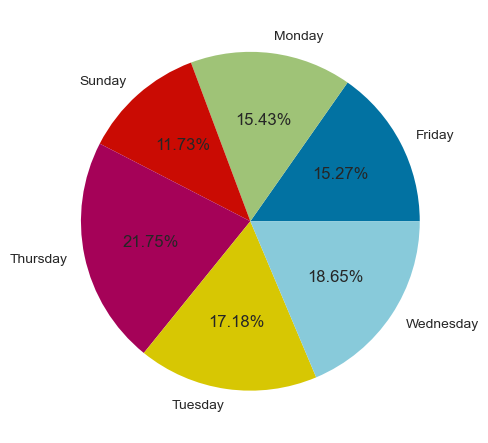

In [170]:
plt.pie(day_count["count no. of invoice"],labels=day_count["Day"],autopct="%.2f%%")
plt.show()

In [171]:
# bar plot
day=df_final["Day"].value_counts()
day

Thursday     4038
Wednesday    3462
Tuesday      3189
Monday       2865
Friday       2835
Sunday       2177
Name: Day, dtype: int64

In [172]:
day.index

Index(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Friday', 'Sunday'], dtype='object')

In [173]:
day.values

array([4038, 3462, 3189, 2865, 2835, 2177], dtype=int64)

Text(0, 0.5, 'No. of invoice')

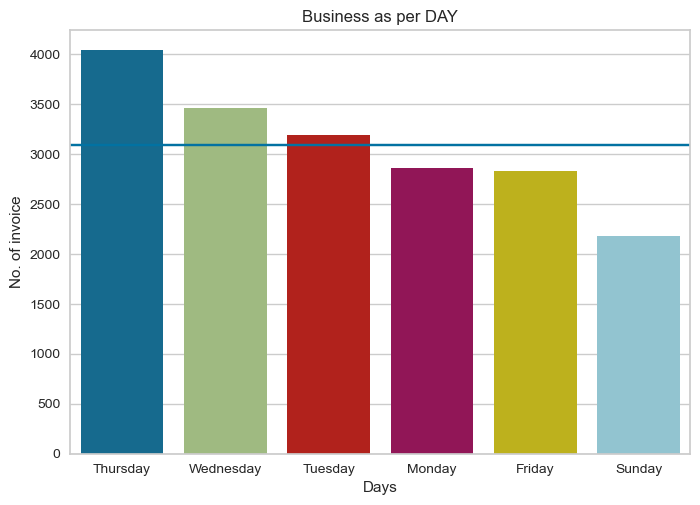

In [174]:
sns.barplot(x=day.index,y=day.values)
plt.axhline(y=day.mean())
plt.title("Business as per DAY")
plt.xlabel("Days")
plt.ylabel("No. of invoice")

In [175]:
# assigment plot the pie and Barplot for Month,season,timing ,week days,weekend.

In [176]:
# lets plot a graph  weekend with timing 

In [177]:
timing=df_final["Timing"].value_counts()
timing

Afternoon    12374
Morning       4210
Evening       1982
Name: Timing, dtype: int64

In [178]:
timing.mean()

6188.666666666667

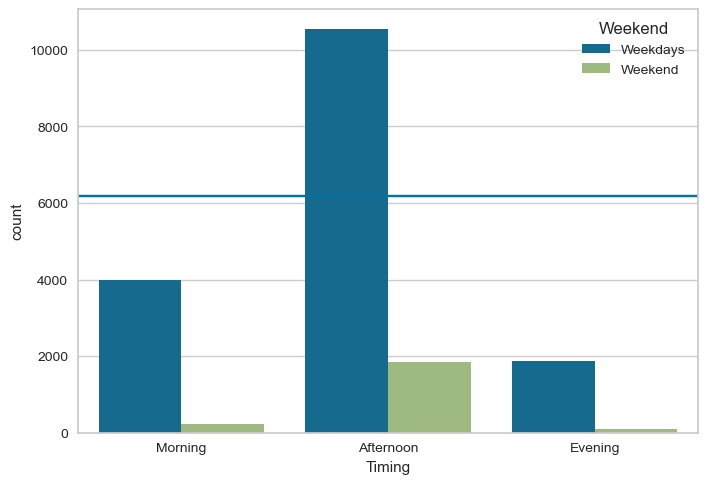

In [179]:
sns.countplot(x=df_final["Timing"],hue=df_final["Weekend"])
plt.axhline(y=timing.mean())

In [ ]:
# find the best selling products

In [180]:
df.head()

,Invoice_No,Item_Code,lower_floor,Item_Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [181]:
df_top=df.drop(["lower_floor","CustomerID"],axis=1)
df_top.head(2)

,Invoice_No,Item_Code,Item_Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom


In [182]:
df_top["Total"]=df_top["Quantity"]*df_top["UnitPrice"]

In [184]:
df_top.drop(["Quantity","UnitPrice"],axis=1,inplace=True)

In [185]:
df_top.head(2)

,Invoice_No,Item_Code,Item_Description,InvoiceDate,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,20.34


In [188]:
# create a pivot table
df_top_pivot=df_top.pivot_table(values="Total",index=["Item_Description"],aggfunc="sum",sort=True).reset_index()

In [189]:
df_top_pivot.head()

,Item_Description,Total
0,20713,0.00
1,4 PURPLE FLOCK DINNER CANDLES,290.80
2,50'S CHRISTMAS GIFT BAG LARGE,2341.13
3,DOLLY GIRL BEAKER,2882.50
4,I LOVE LONDON MINI BACKPACK,1628.17


In [190]:
# best 20 selling product

In [191]:
df_top_pivot.sort_values(by="Total",ascending=False).head(20)

,Item_Description,Total
1098,DOTCOM POSTAGE,206245.48
2915,REGENCY CAKESTAND 3 TIER,164762.19
3918,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
2471,PARTY BUNTING,98302.98
1866,JUMBO BAG RED RETROSPOT,92356.03
2803,RABBIT NIGHT LIGHT,66756.59
2753,POSTAGE,66230.64
2439,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
244,ASSORTED COLOUR BIRD ORNAMENT,58959.73
773,CHILLI LIGHTS,53768.06


In [ ]:
# we can do the same by using groupby function

In [194]:
df_top.groupby("Item_Description").sum().reset_index().sort_values(by="Total",ascending=False).head(20)

,Item_Description,Total
1098,DOTCOM POSTAGE,206245.48
2915,REGENCY CAKESTAND 3 TIER,164762.19
3918,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
2471,PARTY BUNTING,98302.98
1866,JUMBO BAG RED RETROSPOT,92356.03
2803,RABBIT NIGHT LIGHT,66756.59
2753,POSTAGE,66230.64
2439,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
244,ASSORTED COLOUR BIRD ORNAMENT,58959.73
773,CHILLI LIGHTS,53768.06


In [ ]:
# Assignment -- top selling product country wise.
# Assignment -- Top selling as per country( most of the business)